In [0]:
#Importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D

In [0]:
#Loading data 
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

path = "/content/drive/My Drive/Project_TextClassification/IMDB_Dataset.csv"
IMDB_data = pd.read_csv(path)

Mounted at /content/drive


In [0]:
#Checking the Structure of data
IMDB_data.head()
IMDB_data.shape
IMDB_data.info()
IMDB_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [0]:
#Encoding the sentiment to 0 and 1 where 0 corresponds to negative review and 1 is positive review
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
IMDB_data['sentiment'] = label_encoder.fit_transform(IMDB_data['sentiment'])
IMDB_data.head()

In [0]:
#Segregating the dependent and target variables
X = IMDB_data.review
y = IMDB_data.sentiment

In [0]:
# Spliting data into training and testing sets with 80% and 20% respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(X_train.shape, X_test.shape))

Train dataset shape: (40000,), 
Test dataset shape: (10000,)


In [0]:
#Importing pre-trained word embedding
import tensorflow_hub as hub

embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string,trainable=True)

In [0]:
#Building the model
model1 = tf.keras.Sequential()
model1.add(hub_layer)
model1.add(layers.Reshape(target_shape=(20, 1)))
model1.add(Conv1D(128, 5, activation='relu'))
model1.add(layers.LSTM(128,return_sequences=True))
model1.add(layers.LSTM(128))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
reshape (Reshape)            (None, 20, 1)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 16, 128)           768       
_________________________________________________________________
lstm (LSTM)                  (None, 16, 128)           131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8

In [0]:
model1.compile(loss= 'binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
history = model1.fit(X_train, y_train, epochs=10,batch_size=100, validation_split=0.375,
                    callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.001)])

Epoch 1/10
250/250 [==============================] - 5s 22ms/step - loss: 0.5626 - accuracy: 0.6970 - val_loss: 0.4422 - val_accuracy: 0.7964
Epoch 2/10
250/250 [==============================] - 5s 19ms/step - loss: 0.3729 - accuracy: 0.8360 - val_loss: 0.3705 - val_accuracy: 0.8371
Epoch 3/10
250/250 [==============================] - 5s 19ms/step - loss: 0.2904 - accuracy: 0.8792 - val_loss: 0.3367 - val_accuracy: 0.8565
Epoch 4/10
250/250 [==============================] - 5s 19ms/step - loss: 0.2403 - accuracy: 0.9044 - val_loss: 0.3052 - val_accuracy: 0.8695
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 0.2025 - accuracy: 0.9230 - val_loss: 0.3199 - val_accuracy: 0.8675


In [0]:
# Compare how the model performs on the test dataset
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3096 - accuracy: 0.8737
Test loss: 0.3096100389957428
Test accuracy: 0.8737000226974487


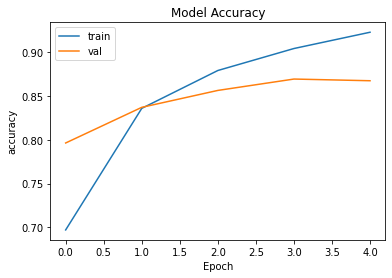

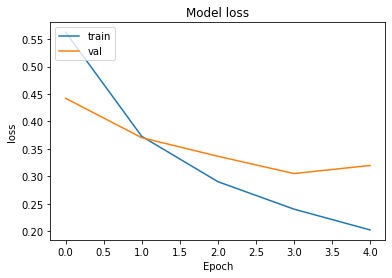

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()